# Training a Neural Network with PyTorch

In [2]:
#once 
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-12-17 18:18:17--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-17 18:18:17--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.13MB/s    in 2m 41s  

2021-12-17 18:20:59 (5.10 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
This will take about 2.5 minutes to compute and plot everyting that has been asked
Ploting for first neural model
Ploting for Second neural model
First model statistics :
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1065
           1       0.53      0.26      0.35       296
           2       0.63      0.73      0.68       921

    accuracy                           0.68      2282
   macro avg       0.64      0.58      0.59      2282
weighted avg       0.67      0.68      0.67      2282


Second model statistics,slight improvement :
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1065
           1       0.47      0.25      0.33       296
           2       0.62      0.77      0.68       921

    accuracy                           0.68      2282
   macro avg       

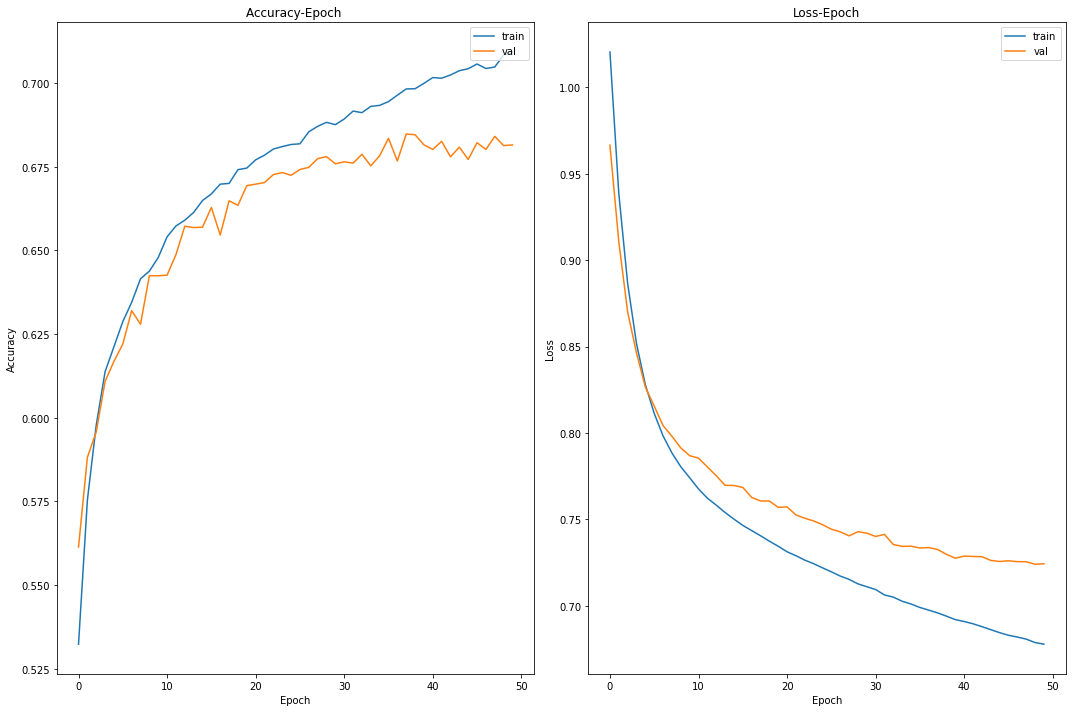

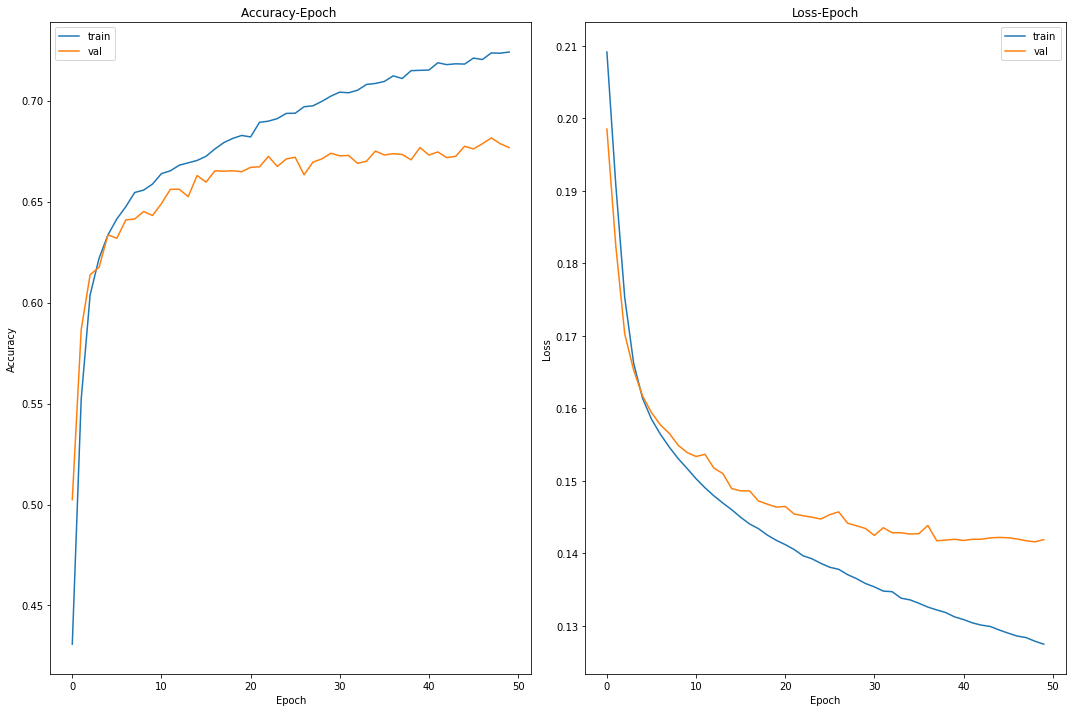

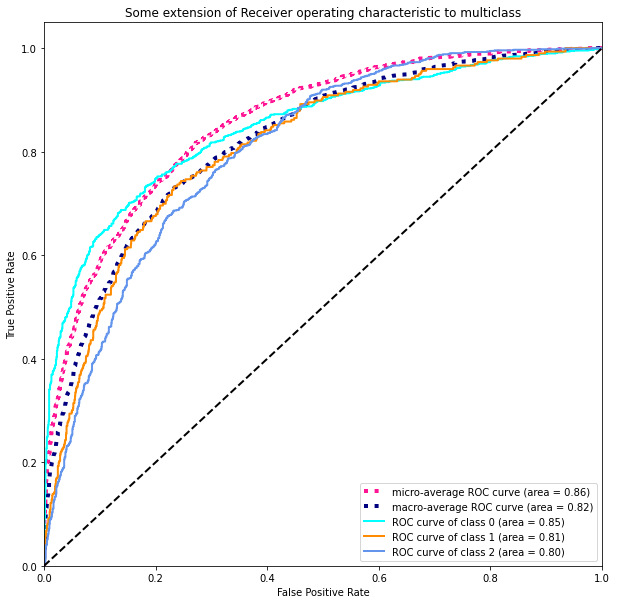


Homework 1 model
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1065
           1       0.68      0.38      0.49       296
           2       0.68      0.76      0.72       921

    accuracy                           0.72      2282
   macro avg       0.71      0.64      0.66      2282
weighted avg       0.72      0.72      0.72      2282


Second neural net model
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1065
           1       0.47      0.25      0.33       296
           2       0.62      0.77      0.68       921

    accuracy                           0.68      2282
   macro avg       0.62      0.58      0.59      2282
weighted avg       0.67      0.68      0.67      2282



In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import torch.nn.functional as nnf
from sklearn.metrics import roc_curve,classification_report,auc
from sklearn.preprocessing import label_binarize
from numpy import interp
from itertools import cycle
import warnings

nltk.download('punkt')

print("This will take about 2.5 minutes to compute and plot everyting that has been asked")


#Reading a csv files with pandas only needs two lines of code
df = pd.read_csv("./vaccine_train_set.csv",index_col=0)
val = pd.read_csv("./vaccine_validation_set.csv",index_col=0)

#for hw1 model######################################################################
X_train = df['tweet']
Y_train = df['label']

X_test = val['tweet']
Y_test  = val['label']
vectorizer = TfidfVectorizer(min_df = 0.001)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

clf =LogisticRegression(max_iter=1000,C=1,penalty='l2',solver='liblinear')
clf.fit(X_train, Y_train)

#Now that we have trained the classifer, we can make predictions on the unseen data
Y_test_pred = clf.predict(X_test)
#Let's also make predictions on the train set for reference
Y_train_pred = clf.predict(X_train)
#####################################################################################
###Clean Data

df['tweet'] = df['tweet'].str.lower()  # easier to clean 
val['tweet'] = val['tweet'].str.lower()

#removes special characters from a sentence
def rm_s_ch(tweet):
    tweet=re.sub(r'[^a-zA-z0-9\s]','',tweet)
    return tweet

def remove_links(tweet):
    tweet = re.sub(r'https\S+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'www.\S+', '', tweet)
    return tweet

df['tweet'] = df['tweet'].apply(lambda x:''.join([i for i in x if i not in string.punctuation])) #remove !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
val['tweet']=val['tweet'].apply(lambda x:''.join([i for i in x if i not in string.punctuation])) #remove !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~

df['tweet']=df['tweet'].apply(rm_s_ch)
val['tweet']=val['tweet'].apply(rm_s_ch) 

df['tweet'] = df['tweet'].apply(lambda x: re.compile(r'<[^>]+>').sub('', x))
val['tweet']=val['tweet'].apply(lambda x: re.compile(r'<[^>]+>').sub('', x)) 

df['tweet']=df['tweet'].apply(remove_links)
val['tweet']=val['tweet'].apply(remove_links) 

X_train = df['tweet']
Y_train = df['label']

X_test = val['tweet']
Y_test  = val['label']

df['tweet'] = [word_tokenize(i) for i in df['tweet']]
val['tweet'] = [word_tokenize(i) for i in val['tweet']]

max_length = 100
embeddings_index = {}
f = open('glove.6B.'+str(max_length)+'d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

def get_pretrained(dataset,maxlen):
  matrix_len = dataset['tweet'].str.len().sum()
  averaged_tweets = []

  for i,sentence in enumerate(dataset['tweet']):
    weight_matrix = np.zeros((len(sentence),maxlen))
    for j,word in enumerate(sentence): 
      if word in embeddings_index:
        weight_matrix[j] = embeddings_index[word]
    averaged_tweets.append(np.mean(weight_matrix,axis=0))            # averaging with np.mean to get equal dimensions

  return np.array(averaged_tweets)


X_train_glove = get_pretrained(pd.DataFrame(df),max_length)
X_test_glove = get_pretrained(pd.DataFrame(val),max_length)

X_train_glove  = torch.tensor(X_train_glove)
X_test_glove = torch.tensor(X_test_glove)

Y_train = torch.squeeze(torch.from_numpy(Y_train.to_numpy()).float())
Y_test = torch.squeeze(torch.from_numpy(Y_test.to_numpy()).float())

#First model (shallow)
class Net(nn.Module):
    def __init__(self, D_in, H1, H2,D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.ReLU1 = nn.ReLU()
        self.linear2 = nn.Linear(H1, H2)
        self.ReLU2 = nn.ReLU()
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        h1 = self.linear1(x)
        h2 = self.ReLU1(h1)
        h3 = self.linear2(h2)
        h4 = self.ReLU2(h3)
        out = self.linear3(h4)
        return  out                         # nnf.softmax(out, dim=1) CrossEntropyLoss does the softmax function dont need to add one here
#Define layer sizes
D_in = X_train_glove.shape[1]
H1 = 90
H2 = 60
D_out = 3

#Define Hyperparameters
learning_rate =0.0001

#Initialize model, loss, optimizer
model = Net(D_in, H1, H2,D_out)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)
# Initialize dataloader
dataset = torch.utils.data.TensorDataset(X_train_glove, Y_train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset2 = torch.utils.data.TensorDataset(X_test_glove, Y_test)
dataloader2 = torch.utils.data.DataLoader(dataset2, batch_size=64, shuffle=True)


Loss=[]
valLoss=[]
accuracy=[]
valaccuracy=[]
for epoch in range(50):
  batch_losses = []
  correct=0
  for x_batch, y_batch in dataloader:
    y_pred = model.forward(x_batch.float())
    
    loss = loss_func(y_pred,y_batch.long())
    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    y_pred_1d=[[y_pred[i][0],y_pred[i][1],y_pred[i][2]].index(max([y_pred[i][0],y_pred[i][1],y_pred[i][2]]))for i in range(len(y_pred))]
    
    y_pred_1d=torch.tensor(y_pred_1d)

    c = (y_batch == y_pred_1d).float() 
    correct+=c.sum() / len(c)

  Loss.append(sum(batch_losses)/len(dataloader))
  accuracy.append(correct/len(dataloader))


  val_batch_losses=[]
  valcorrect=0
  for x_batch, y_batch in dataloader2:
    y_pred_val = model.forward(x_batch.float())
  
    valloss = loss_func(y_pred_val,y_batch.long())
    val_batch_losses.append(valloss.item())

    y_pred_1d_val=[[y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]].index(max([y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]]))for i in range(len(y_pred_val))]
  
    y_pred_1d_val=torch.tensor(y_pred_1d_val)
   
    cval = (y_batch ==y_pred_1d_val).float() 
    valcorrect+=cval.sum() / len(cval)

  valLoss.append(sum(val_batch_losses)/len(dataloader2))
  valaccuracy.append(valcorrect/len(dataloader2))

print("Ploting for first neural model")
figure, axes = plt.subplots(ncols=2,figsize=(15, 10))
axes[1].plot(Loss)
axes[1].plot(valLoss)
axes[1].set_title('Loss-Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['train','val'], loc='upper right')



axes[0].plot(accuracy)
axes[0].plot(valaccuracy)
axes[0].set_title('Accuracy-Epoch ')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['train','val'], loc='upper right')
figure.tight_layout()

#Second deeper model , better results
class Net_2(nn.Module):
    def __init__(self, D_in, H1,H2,H3,D_out):
        super(Net_2, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.ReLU1 = nn.ReLU()
        self.linear2 = nn.Linear(H1, H2)
        self.ReLU2 = nn.ReLU()
        self.linear3 = nn.Linear(H2,H3)
        self.ReLU3 = nn.ReLU()
        self.linear4 = nn.Linear(H3, D_out)

    def forward(self, x):
        h1 = self.linear1(x)
        h2 = self.ReLU1(h1)
        h3 = self.linear2(h2)
        h4 = self.ReLU2(h3)
        h5 = self.linear3(h4)
        h6 = self.ReLU3(h5)
        out = self.linear4(h6)
        return  nnf.softmax(out, dim=1)

#Define layer sizes
D_in = X_train_glove.shape[1]
H1 = 90
H2 = 60
H3 = 30
D_out = 3

#Define Hyperparameters
learning_rate =0.0001

#Initialize model, loss, optimizer
model2 = Net_2(D_in, H1, H2,H3,D_out)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
# Initialize dataloader
dataset = torch.utils.data.TensorDataset(X_train_glove, Y_train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataset2 = torch.utils.data.TensorDataset(X_test_glove, Y_test)
dataloader2 = torch.utils.data.DataLoader(dataset2, batch_size=64, shuffle=True)


Loss=[]
valLoss=[]
accuracy=[]
valaccuracy=[]
for epoch in range(50):
  batch_losses = []
  correct=0
  for x_batch, y_batch in dataloader:
    y_pred = model2.forward(x_batch.float())
    y_batch_n = label_binarize(y_batch, classes=[0, 1, 2])
    y_batch_n=torch.tensor(y_batch_n)

    loss = loss_func(y_pred,y_batch_n.float())
    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    y_pred_1d=[[y_pred[i][0],y_pred[i][1],y_pred[i][2]].index(max([y_pred[i][0],y_pred[i][1],y_pred[i][2]]))for i in range(len(y_pred))]
    
    y_pred_1d=torch.tensor(y_pred_1d)

    c = (y_batch == y_pred_1d).float() 
    correct+=c.sum() / len(c)

  Loss.append(sum(batch_losses)/len(dataloader))
  accuracy.append(correct/len(dataloader))


  val_batch_losses=[]
  valcorrect=0
  for x_batch, y_batch in dataloader2:
    y_pred_val = model2.forward(x_batch.float())
    y_batch_n = label_binarize(y_batch, classes=[0, 1, 2])

    y_batch_n=torch.tensor(y_batch_n)

    valloss = loss_func(y_pred_val,y_batch_n)
    val_batch_losses.append(valloss.item())

    y_pred_1d_val=[[y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]].index(max([y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]]))for i in range(len(y_pred_val))]
  
    y_pred_1d_val=torch.tensor(y_pred_1d_val)
   
    cval = (y_batch ==y_pred_1d_val).float() 
    valcorrect+=cval.sum() / len(cval)

  valLoss.append(sum(val_batch_losses)/len(dataloader2))
  valaccuracy.append(valcorrect/len(dataloader2))

print("Ploting for Second neural model")
figure, axes = plt.subplots(ncols=2,figsize=(15, 10))
axes[1].plot(Loss)
axes[1].plot(valLoss)
axes[1].set_title('Loss-Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['train','val'])



axes[0].plot(accuracy)
axes[0].plot(valaccuracy)
axes[0].set_title('Accuracy-Epoch ')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['train','val'])
figure.tight_layout()

warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

y_pred_val = model.forward(X_test_glove.float())
y_pred_val = torch.squeeze(y_pred_val)

y_pred_1d_val=[[y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]].index(max([y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]]))for i in range(len(y_pred_val))]
print("First model statistics :")
y_pred_1d_val=torch.tensor(y_pred_1d_val)
y_pred_1d_val = y_pred_1d_val.cpu()
Y_test = Y_test.cpu()
print(classification_report(Y_test,y_pred_1d_val,labels=np.unique(y_pred_1d_val)))

print("\nSecond model statistics,slight improvement :")

y_pred_val = model2.forward(X_test_glove.float())
y_pred_val = torch.squeeze(y_pred_val)
y_pred_1d_val=[[y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]].index(max([y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]]))for i in range(len(y_pred_val))]
y_pred_1d_val=torch.tensor(y_pred_1d_val)
y_pred_1d_val = y_pred_1d_val.cpu()

y_pred_1d_val=[[y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]].index(max([y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]]))for i in range(len(y_pred_val))]
print(classification_report(Y_test,y_pred_1d_val,labels=np.unique(y_pred_1d_val)))



print("Ploting ROC for second neural model")
# Get predictions of our best model.
y_score = model2.forward(X_test_glove.float())

# Convert tensors to numpy arrays after we pass them to cpu.
y_score = y_score.cpu().detach().numpy()
y = Y_test.cpu().detach().numpy()

# Label binarization and store num of classes.
y_test = label_binarize(y, classes=[0, 1, 2])
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])


# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

print("\nHomework 1 model")
print(classification_report(Y_test,Y_test_pred,labels=np.unique(y_pred_1d_val)))

print("\nSecond neural net model")
print(classification_report(Y_test,y_pred_1d_val,labels=np.unique(y_pred_1d_val)))